# YOLO

In [1]:
import os

import torch
import cv2
import numpy as np
from ultralytics import YOLO

import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
classes = ['10C', '10D', '10H', '10s',
            '2C', '2D', '2H', '2S',
            '3C', '3D', '3H', '3S',
            '4C', '4D', '4H', '4S',
            '5C', '5D', '5H', '5S', 
            '6C', '6D', '6H', '6S', 
            '7C', '7D', '7H', '7S', 
            '8C', '8D', '8H', '8S', 
            '9C', '9D', '9H', '9S', 
            'AC', 'AD', 'AH', 'AS', 
            'JC', 'JD', 'JH', 'JS', 
            'KC', 'KD', 'KH', 'KS', 
            'QC', 'QD', 'QH', 'QS']

idx2label = {idx: label for idx, label in enumerate(classes)}
label2idx = {label: idx for idx, label in idx2label.items()}

In [4]:
def plot_images_with_boxes(images_path:str, labels_path:str, n_images:int=9) -> None:

    img_files = os.listdir(images_path)
    sample_imgs = np.random.choice(img_files, n_images)

    fig, axs = plt.subplots(n_images//3, 3, figsize=(10, 16))
    for i, img_file in enumerate(sample_imgs):
        row = i//3
        col = i%3

        img_path = os.path.join(images_path, img_file)
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

        label_path = os.path.join(labels_path, img_file[:-4] + '.txt')
        f = open(label_path, 'r')

        for label in f:
            class_id, x_center, y_center, width, height = map(float, label.split())
            h, w, _ = img.shape
            x_min = int((x_center - width/2) * w)
            y_min = int((y_center - height/2) * h)
            x_max = int((x_center + width/2) * w)
            y_max = int((y_center + height/2) * h)
            cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(img, idx2label[int(class_id)], (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

        axs[row, col].imshow(img)
        axs[row, col].axis('off')

    plt.show()


In [5]:
train_images_path = './dataset/train/images'
train_labels_path = './dataset/train/labels'

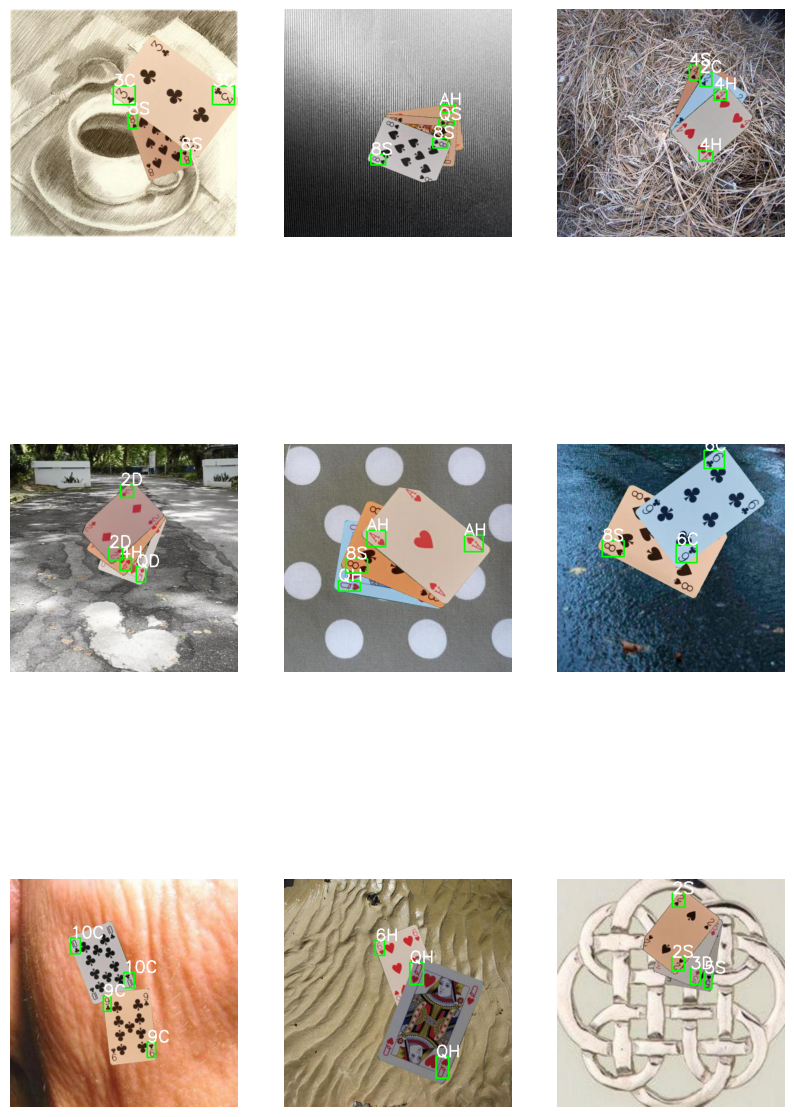

In [6]:
plot_images_with_boxes(train_images_path, train_labels_path)

In [9]:
model = YOLO('yolo11n.pt')
model.to(device)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_